In [1]:
def get_tweets_dataset(query_search, until_date, max_tweets):
    import pandas as pd
    import GetOldTweets3 as got
    tweets = []
    for word in query_search.split():
        tweetCriteria = got.manager.TweetCriteria().setQuerySearch(word).setUntil(until_date).setMaxTweets(max_tweets)
        for tweet in got.manager.TweetManager.getTweets(tweetCriteria):
            if not tweet in tweets:
                tweets.append(tweet)
    hashs = []
    texts = []
    dates = []
    retweets = []
    favorites = []
    usernames = []
    for tweet in tweets:
        hash_positions = [pos for pos, char in enumerate(tweet.hashtags) if char == '#']
        tweet_hashs = []
        texts.append(tweet.text)
        dates.append(tweet.date)
        retweets.append(tweet.retweets)
        favorites.append(tweet.favorites)
        usernames.append(tweet.username)
        for ind in hash_positions:
            if tweet.hashtags.find(' ', ind) == -1:
                word = tweet.hashtags[ind:]
                tweet_hashs.append(word)
            else:
                end = tweet.hashtags.find(' ', ind)
                word = tweet.hashtags[ind:end]
                tweet_hashs.append(word)
        hashs.append(tweet_hashs)
    return pd.DataFrame({"Username":usernames, "Date":dates, "Favorites":favorites, "Retweets":retweets, "Hashtags":hashs, "Text":texts})

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    import re
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    from textblob import TextBlob
    analysis = TextBlob(clean_tweet(tweet))
    return analysis.sentiment.polarity

%matplotlib inline

In [3]:
pip install GetOldTweets3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
referendum_campaign_dataset = pd.read_csv("referendum_campaign_dataset.csv")

In [7]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 12.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
referendum_campaign_dataset['Sentiment'] = np.array([ analyze_sentiment(text) for text in referendum_campaign_dataset['Text'] ])
referendum_campaign_dataset.head(10)

,Username,Date,Favorites,Retweets,Hashtags,Text,Sentiment
0,jonathanfryer,2013-01-24 23:52:14+00:00,0,4,"['#Cameron', '#UK', '#EU']",Shirley Williams is right that #Cameron is on ...,0.285714
1,mirnalavado,2013-01-24 23:51:22+00:00,0,0,"['#Francia', '#Alemania', '#Cameron', '#']",#Francia y #Alemania responden a #Cameron que ...,0.000000
2,AndyP1000,2013-01-24 23:48:38+00:00,0,0,"['#Cameron', '#Merkel', '#EU']",#Cameron is the biggest loser in british polit...,0.000000
3,Dequinceyschimp,2013-01-24 23:45:43+00:00,0,0,['#Cameron'],@Neilovichi It's not the Tory way. Besides #Ca...,-0.200000
4,SamIngro,2013-01-24 23:45:14+00:00,0,0,"['#Cameron', '#Jordan', '#Saints']","Feel bad for #Cameron #Jordan , spent all seas...",-0.191111
5,jonathanfryer,2013-01-24 23:45:10+00:00,0,1,"['#bbctw', '#Cameron', '#EU', '#UKIP']",So who does #bbctw get to comment on #Cameron ...,-1.000000
6,scarletmonahan,2013-01-24 23:43:44+00:00,0,1,"['#williamhague', '#satire', '#politics', '#ca...",#williamhague Spawn Drone! http:// yfrog.com/4...,0.000000
7,Ashley_Bullard,2013-01-24 23:42:33+00:00,0,0,"['#bbctw', '#politics', '#UKPolitics', '#Conse...",Wow the innuendo on #bbctw this evening is ver...,0.150000
8,RyoungRory,2013-01-24 23:39:43+00:00,0,0,"['#Cameron', '#davos', '#bbcqt', '#bbcdailypol...",#Cameron @#davos : 'Come to Britain we are cut...,-0.102500
9,scarletmonahan,2013-01-24 23:37:43+00:00,0,0,"['#McDonalds', '#satire', '#THATCHER', '#polit...",George Osborne is truly the leader of a heard ...,0.000000


-0.3354614374534716
0.9420539389980016
0.8333189909777525
-0.5527924196982267
-0.9737404985951378
0.2276608033801438


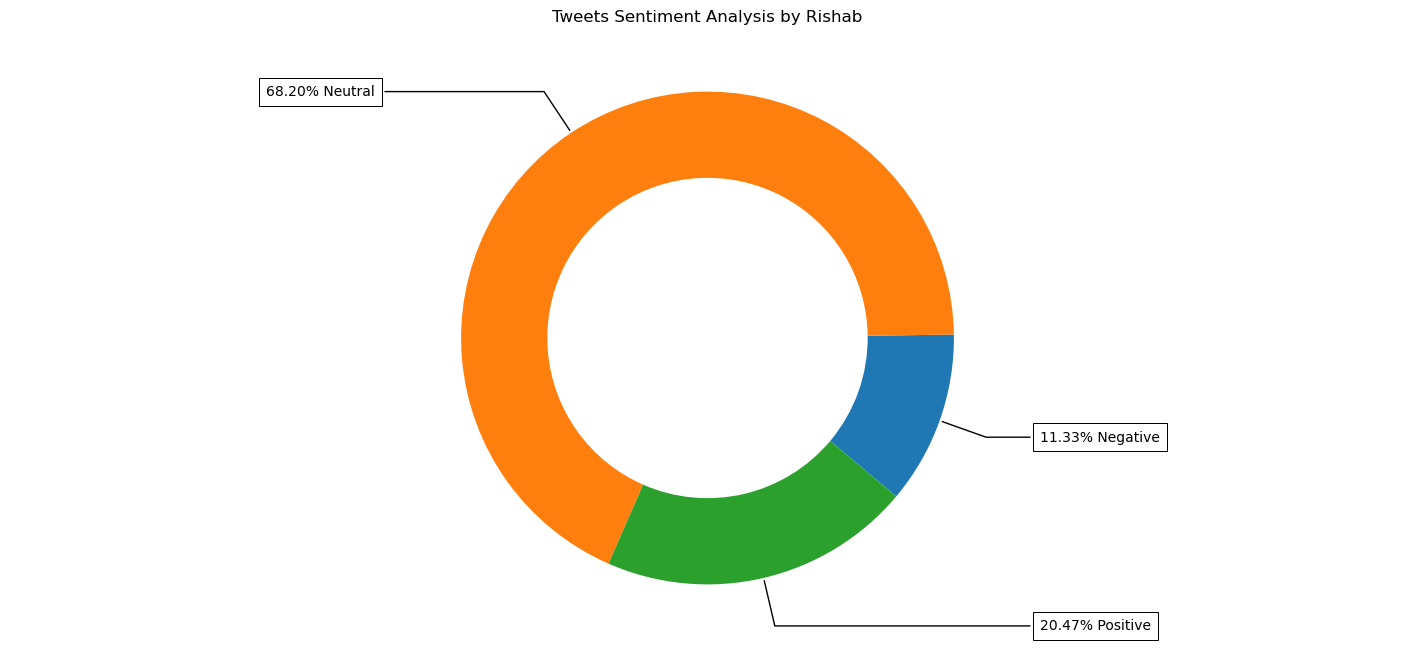

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 8), subplot_kw=dict(aspect="equal"))
ax.axis("equal")

data = [
    100 * round(sum(referendum_campaign_dataset['Sentiment'] < 0) / len(referendum_campaign_dataset['Sentiment']), 5),
    100 * round(sum(referendum_campaign_dataset['Sentiment'] == 0) / len(referendum_campaign_dataset['Sentiment']), 5),
    100 * round(sum(referendum_campaign_dataset['Sentiment'] > 0) / len(referendum_campaign_dataset['Sentiment']), 5)
]
labels = ['Negative','Neutral','Positive']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.35), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    print(y)
    x = np.cos(np.deg2rad(ang))
    print(x)
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate("{:.2f}%".format(data[i]) + " " + labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.2*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Tweets Sentiment Analysis by Rishab")
plt.show()

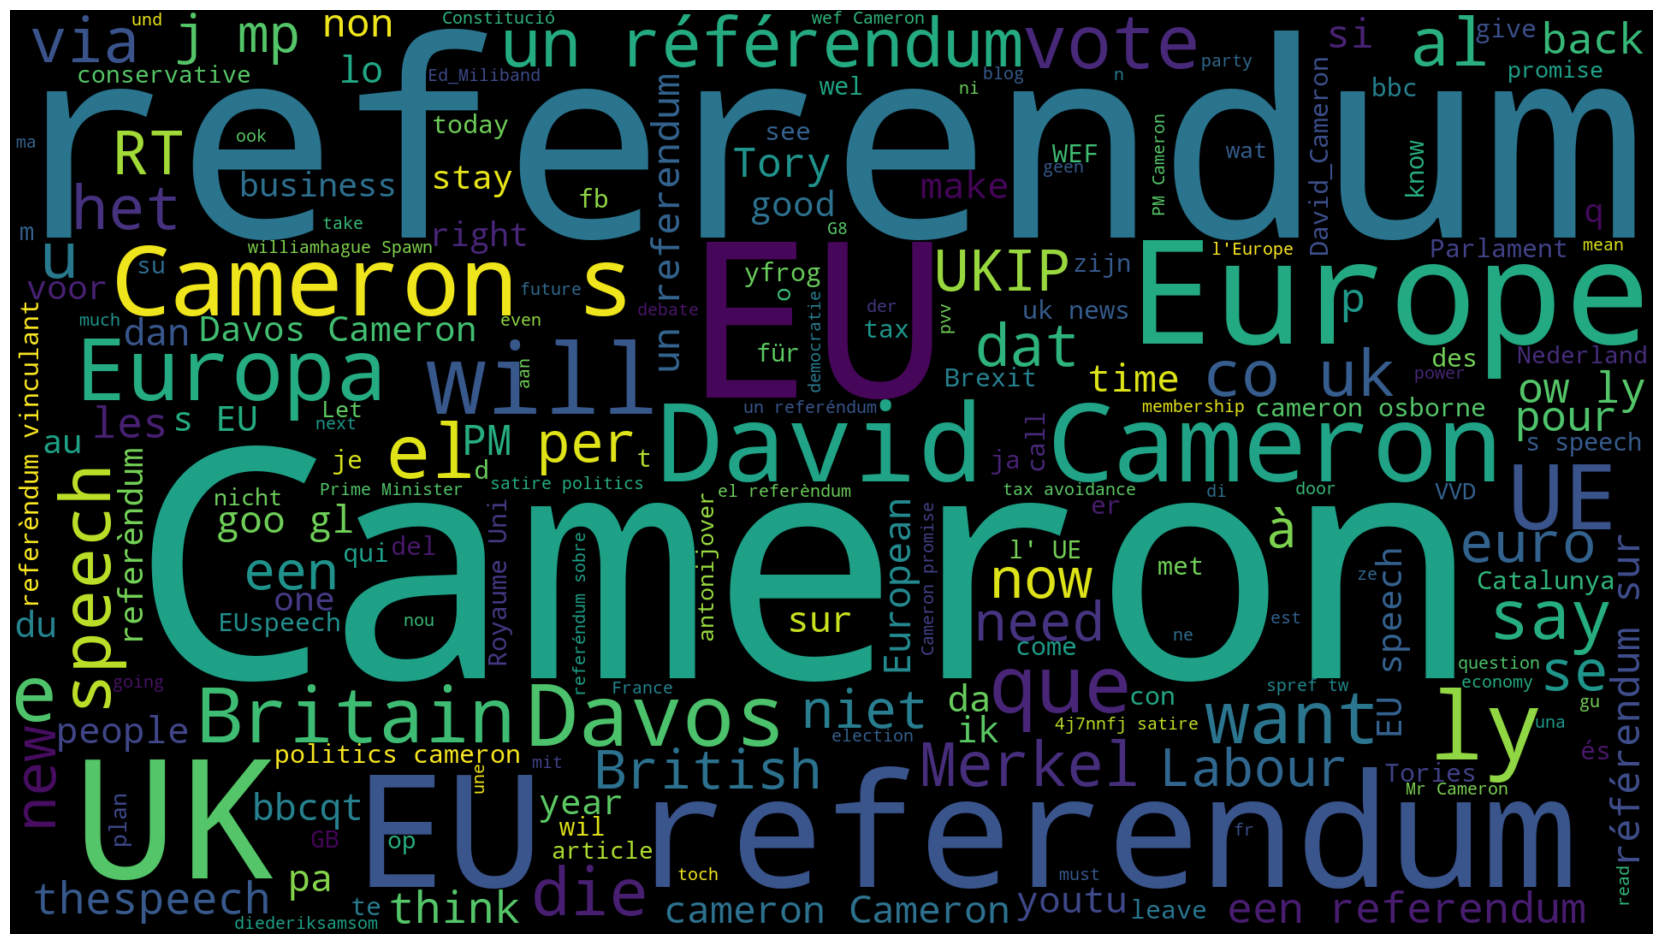

In [51]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(txt for txt in referendum_campaign_dataset['Text'])

stopwords = set(STOPWORDS)
stopwords.update(["bit", "pic", "twitter", "il", "html", "https", "de", "la", "en", "van", "le", "maintien", "maar", "gamble", "et", "en"])
wordcloud = WordCloud(height=1080, stopwords=stopwords, width=1920, background_color="black").generate(text)

plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("cameron_campaign.png");

In [17]:

elections_dataset = pd.read_csv("elections_dataset.csv")
elections_dataset['Sentiment'] = np.array([ analyze_sentiment(text) for text in elections_dataset['Text'] ])
elections_dataset.head(10)

,Username,Date,Favorites,Retweets,Hashtags,Text,Sentiment
0,DrTeckKhong,2015-05-08 23:55:55+00:00,0,0,['#Conservative'],Election of #Conservative Anne Bond (right) as...,0.285714
1,ThomasEvansSDP,2015-05-08 23:55:23+00:00,3,1,"['#GE2015', '#Labour', '#Conservative', '#SNP']",A few things to seriously ponder with regards ...,-0.266667
2,DrTeckKhong,2015-05-08 23:53:27+00:00,0,1,['#Conservative'],Election of #Conservative Bhupendra Dave (2nd ...,0.000000
3,Ramblintweets,2015-05-08 23:51:58+00:00,0,0,['#Conservative'],Theresa May has confirmed on Twitter that she ...,0.400000
4,FrankieHall04,2015-05-08 23:48:13+00:00,0,0,"['#Conservative', '#true', '#blue', '#deliver'...",10 #Conservative promises.. http://www. telegr...,0.116667
5,therealmrhenry,2015-05-08 23:48:02+00:00,0,0,['#Conservative'],There was an article that showed the #Conserva...,0.187500
6,DavidPrebble,2015-05-08 23:46:43+00:00,0,0,"['#Conservative', '#GE2015']",Congratulations @DavidCameron_MP excellent cam...,0.666667
7,nathanbroon,2015-05-08 23:46:02+00:00,0,0,['#Conservative'],@IanHaigh77 not really. The #Conservative part...,-0.100000
8,cianb800,2015-05-08 23:42:06+00:00,0,0,['#Conservative'],#Conservative delighted @David_Cameron will re...,0.700000
9,theredandblue,2015-05-08 23:41:35+00:00,0,0,"['#GE2015', '#Conservative']",The British Left would've unhesitatingly accep...,0.025000


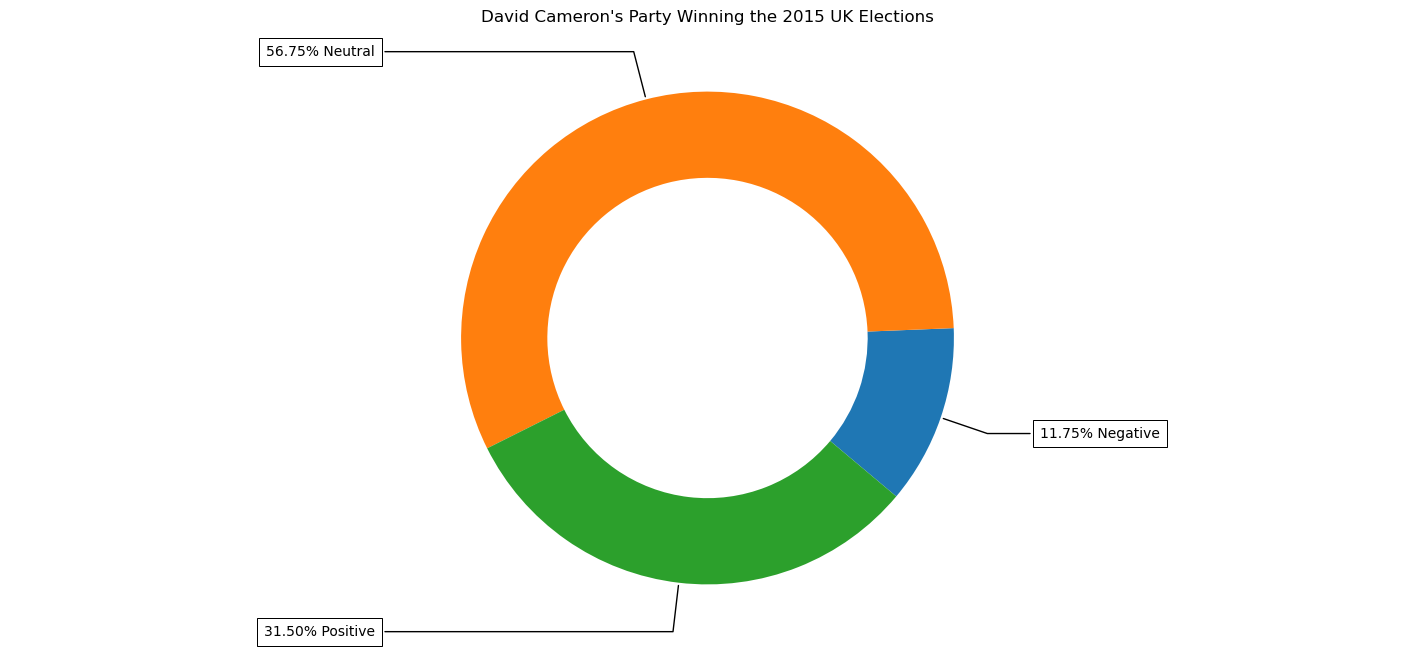

In [18]:
fig, ax = plt.subplots(figsize=(18, 8), subplot_kw=dict(aspect="equal"))
ax.axis("equal")

data = [
    100 * round(sum(elections_dataset['Sentiment'] < 0) / len(elections_dataset['Sentiment']), 5),
    100 * round(sum(elections_dataset['Sentiment'] == 0) / len(elections_dataset['Sentiment']), 5),
    100 * round(sum(elections_dataset['Sentiment'] > 0) / len(elections_dataset['Sentiment']), 5)
]
labels = ['Negative','Neutral','Positive']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.35), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate("{:.2f}%".format(data[i]) + " " + labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.2*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("David Cameron's Party Winning the 2015 UK Elections")
plt.show()

In [20]:
pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
from chart_studio import plotly
import networkx as nx
G = nx.Graph()
G.clear()

In [16]:
pip install plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 36.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
hashtags = []
for hash_list in elections_dataset.values[:,4]:
    hashtags.extend(hash_list[2:-2].split("', '"))
from collections import OrderedDict
hashtags = list(OrderedDict.fromkeys(hashtags))
for hashtag in hashtags:
    G.add_node(hashtag.lower(), name=hashtag.lower())

edges = []
for hash_list in elections_dataset.values[:,4]:
    hash_list = hash_list[2:-2].split("', '")
    if len(hash_list) > 1:
        for i in range(0,len(hash_list)):
            for j in range(i+1,len(hash_list)):
                edges.append([hash_list[i].lower(), hash_list[j].lower()])
for edge in edges:
    G.add_edge(edge[0], edge[1])

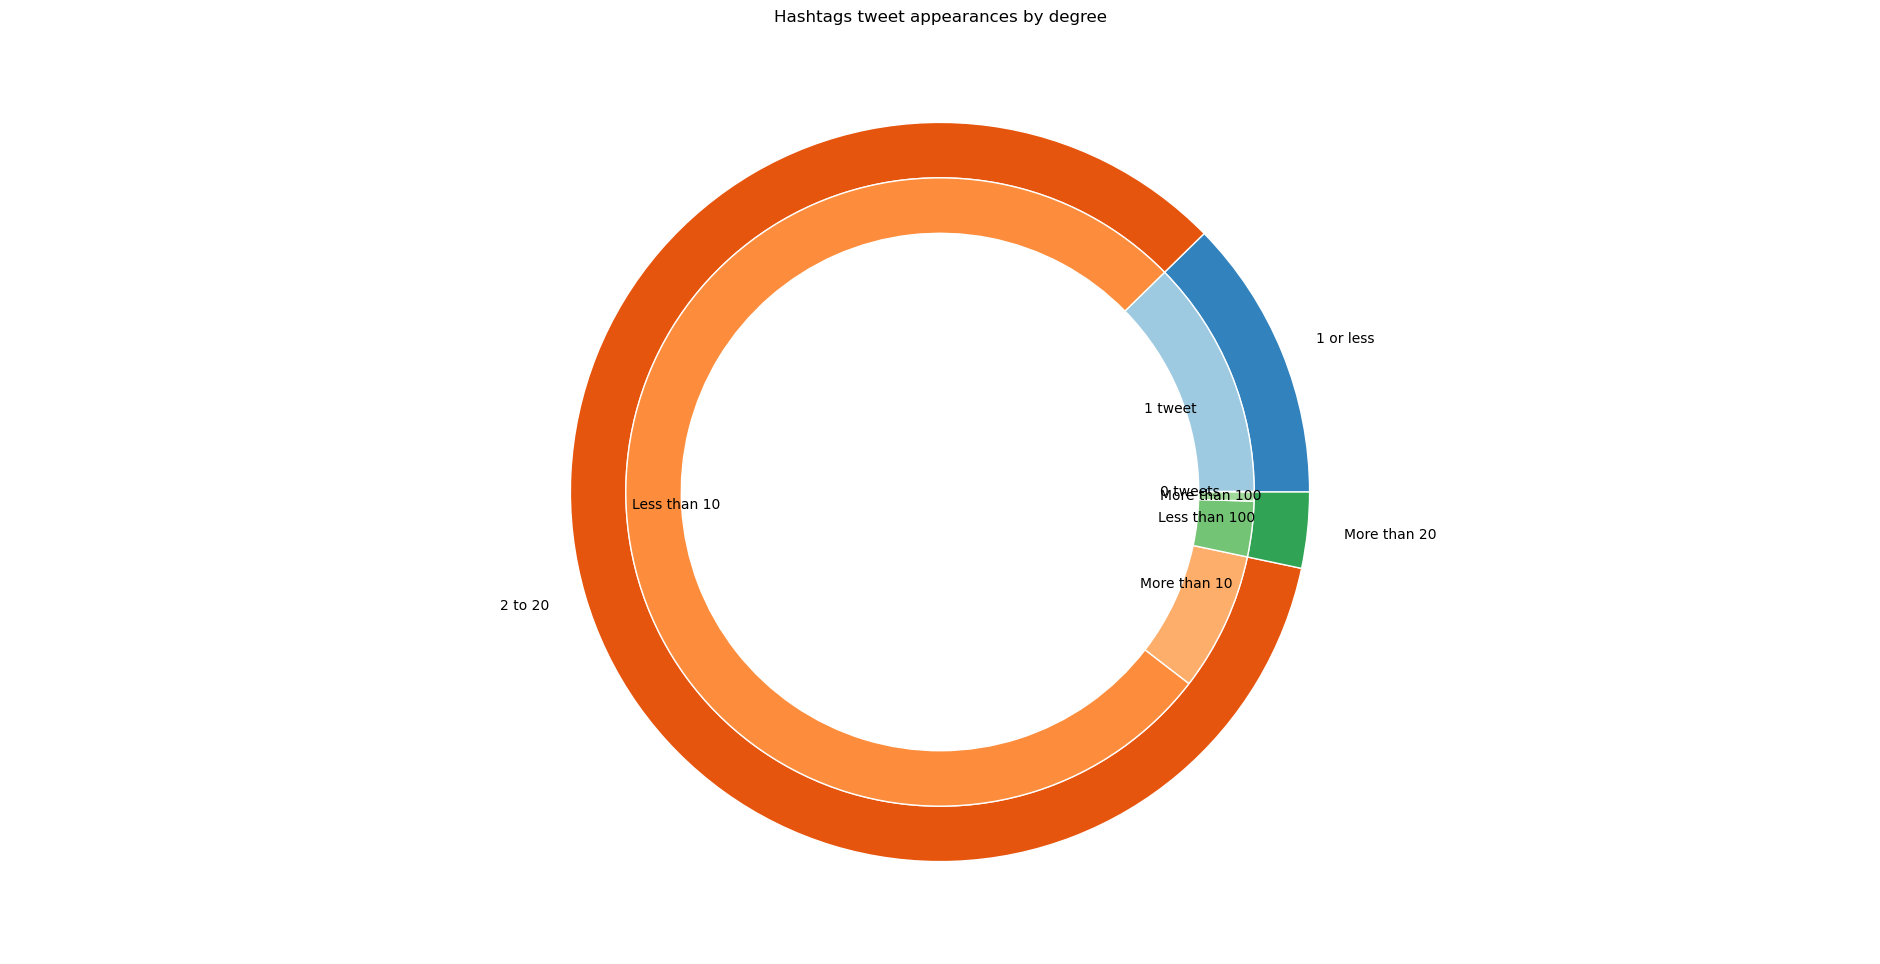

Les hashtags apparant dans plus que 20 tweets et moins que 100 tweets sont de 86 tweets.
Les hashtags apparant dans plus que 100 tweets sont de 14 tweets.


In [24]:
fig, ax = plt.subplots(figsize=(24, 12))
ax.axis('equal')
width = 0.15

cm = plt.get_cmap("tab20c")
cout = cm(np.arange(3)*4)
vals_out = [len([d for d in G.degree if d[1] <= 1]),
            len([d for d in G.degree if d[1] <= 20 and d[1] > 1]),
            len([d for d in G.degree if d[1] > 20])
           ]
pie, _ = ax.pie(vals_out, radius=1, labels=["1 or less", "2 to 20", "More than 20"], colors=cout)
plt.setp( pie, width=width, edgecolor='white')

cin = cm(np.array([1,2,5,6,9,10]))
labels = list(map("".join, zip(["0 tweets", "1 tweet", "Less than 10", "More than 10", "Less than 100", "More than 100"])))
vals_in = [len([d for d in G.degree if d[1] == 0]),
           len([d for d in G.degree if d[1] == 1]),
           len([d for d in G.degree if d[1] > 1 and d[1] <= 10]),
           len([d for d in G.degree if d[1] > 10 and d[1] <= 20 ]),
           len([d for d in G.degree if d[1] > 20 and d[1] <= 100]),
           len([d for d in G.degree if d[1] > 100])
          ]
pie2, _ = ax.pie(vals_in, radius=1-width, labels=labels,
                                      labeldistance=0.7, colors=cin)
plt.setp( pie2, width=width, edgecolor='white')
plt.title("Hashtags tweet appearances by degree")
plt.show()


<h4>Following our visualized graph, we decided to eliminate hashtags appearing in 20 or less tweets to study the most influential relationships between the remaining hashtags.¶.</h4>

In [25]:
G.remove_nodes_from([d[0] for d in G.degree if d[1] <= 20 ])

In [52]:
print("hashtags remaining in our graph are", len([d for d in G.degree]), "")

hashtags remaining in our graph are 100 


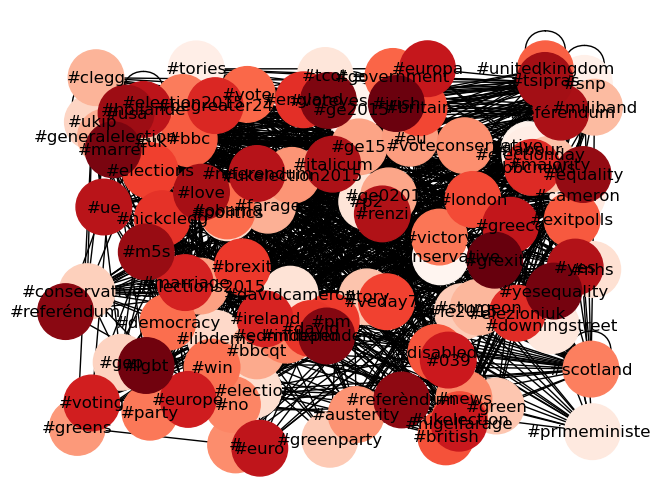

In [27]:
nx.draw(G, node_size=1600, cmap=plt.cm.Reds,
        node_color=range(len(G)), pos=nx.random_layout(G), with_labels=True)

<h4>Since even trying a lot of 'layouts' of the 'networkx' module and we still can't identify our nodes, we will use the Gephi software for the visualization of our graph</h4>

In [53]:
nx.write_gexf(G, "elections_2015.gexf")

<center>
    <strong>Hashtags shared between Tweets</strong>
    <img src="Elections_2015_Graph_Analysis.png">
</center>

In [31]:

brexit_cameron_resign_dataset = pd.read_csv("brexit_cameron_resign_dataset.csv")
brexit_cameron_resign_dataset['Sentiment'] = np.array([ analyze_sentiment(text) for text in brexit_cameron_resign_dataset['Text'] ])
brexit_cameron_resign_dataset.head(10)

,Username,Date,Favorites,Retweets,Hashtags,Text,Sentiment
0,DollarVigilante,2016-06-25 23:59:59+00:00,18,10,"['#Brexit', '#Investing']",You Could Have Prospered Greatly from the #Bre...,0.800
1,747Gold,2016-06-25 23:59:58+00:00,0,0,['#Brexit'],I liked a @YouTube video from @lack78 http:// ...,0.300
2,ARMAKdeODELOT,2016-06-25 23:59:58+00:00,2,0,['#Brexit'],Desmontando la Historia Oficial del Brexit + 1...,0.000
3,drwilcox,2016-06-25 23:59:57+00:00,1,0,['#Brexit'],Pretty apt #Brexit analogy: pic.twitter.com/XM...,0.425
4,veryFatcat,2016-06-25 23:59:57+00:00,1,1,['#Brexit'],"Don't forget that the #Brexit is just a vote, ...",0.000
5,serenacwy,2016-06-25 23:59:55+00:00,0,0,"['#EUref', '#Brexit', '#regexit']",. @timminchin tweets are spot on #EUref #Brexi...,0.000
6,4589roger,2016-06-25 23:59:54+00:00,1,1,"['#Boris', '#Gove', '#Brexit', '#EU']",There are liars and then there’s #Boris Johnso...,0.000
7,mitchr777,2016-06-25 23:59:53+00:00,0,0,"['#Brexit', '#isis', '#WriteAPoemAboutBrexit']",Roses are red as is blood we vote #Brexit #isi...,0.000
8,Eduflack,2016-06-25 23:59:51+00:00,3,21,['#Brexit'],"In recognition of #Brexit , my redeye flight m...",0.000
9,GoldEagleCom,2016-06-25 23:59:51+00:00,3,3,"['#Gold', '#Silver', '#brexit']",#Gold And #Silver Prices This Week #brexit htt...,0.000


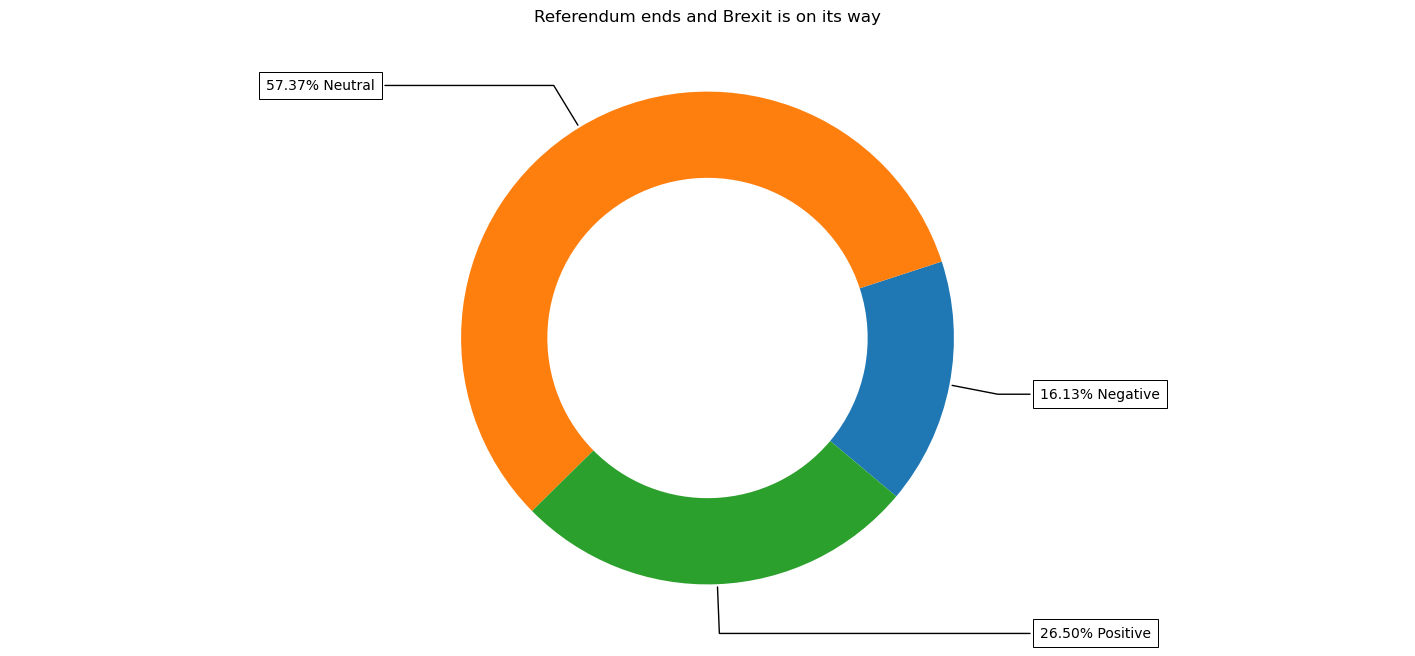

In [32]:
fig, ax = plt.subplots(figsize=(18, 8), subplot_kw=dict(aspect="equal"))
ax.axis("equal")

data = [
    100 * round(sum(brexit_cameron_resign_dataset['Sentiment'] < 0) / len(brexit_cameron_resign_dataset['Sentiment']), 5),
    100 * round(sum(brexit_cameron_resign_dataset['Sentiment'] == 0) / len(brexit_cameron_resign_dataset['Sentiment']), 5),
    100 * round(sum(brexit_cameron_resign_dataset['Sentiment'] > 0) / len(brexit_cameron_resign_dataset['Sentiment']), 5)
]
labels = ['Negative','Neutral','Positive']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.35), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate("{:.2f}%".format(data[i]) + " " + labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.2*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Referendum ends and Brexit is on its way")
plt.show()

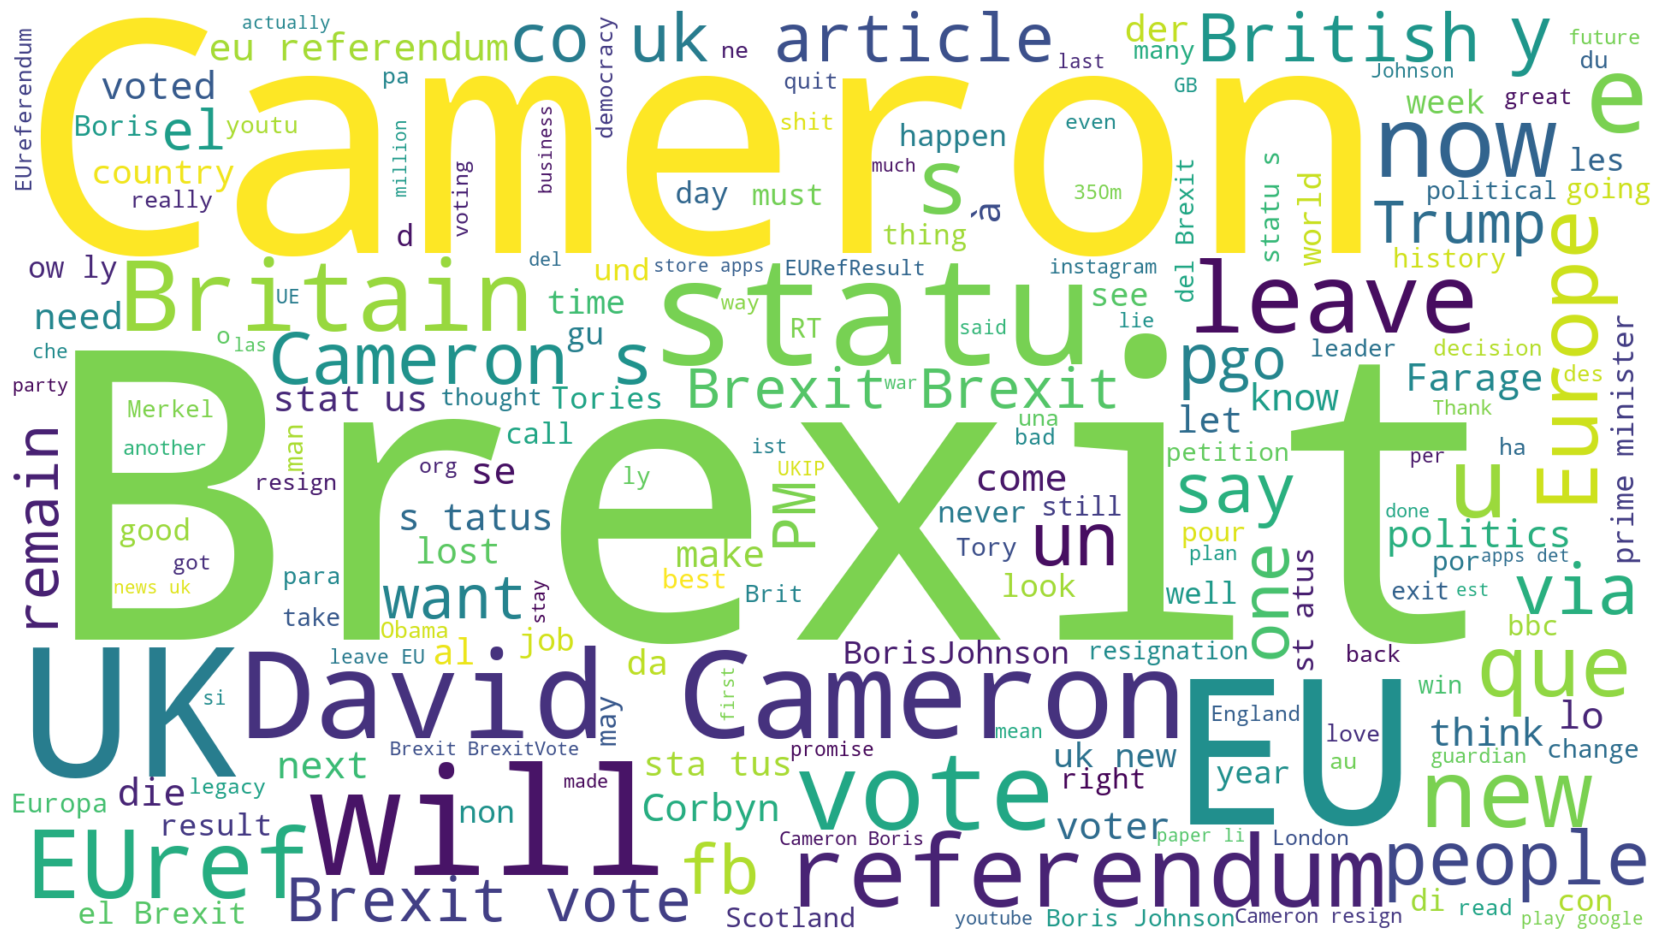

In [33]:
text = " ".join(txt for txt in brexit_cameron_resign_dataset['Text'])

stopwords = set(STOPWORDS)
stopwords.update(["bit", "pic", "twitter", "il", "html", "https", "de", "la", "en", "van", "le", "maintien", "maar", "gamble", "et", "en"])
wordcloud = WordCloud(height=1080, stopwords=stopwords, width=1920, background_color="white").generate(text)

plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("brexit_on_its_way.png");

In [35]:

brexit_effective_dataset = pd.read_csv("brexit_effective_dataset.csv")
brexit_effective_dataset['Sentiment'] = np.array([ analyze_sentiment(text) for text in brexit_effective_dataset['Text'] ])
brexit_effective_dataset.head(10)

,Username,Date,Favorites,Retweets,Hashtags,Text,Sentiment
0,aliaswhoever,2017-03-30 23:59:59+00:00,0,0,"['#BBC', '#against', '#Brexit', '#bullshitbaff...",#BBC urged to stand firm #against accusations ...,-0.200000
1,MrBrandonHee,2017-03-30 23:59:57+00:00,0,0,['#brexit'],Larry doesn't give a fuck about #brexit Larry ...,-0.400000
2,agegomez,2017-03-30 23:59:57+00:00,0,0,['#brexit'],Gobierno francés aseguró que negociación del “...,0.000000
3,TomJ8899,2017-03-30 23:59:48+00:00,0,0,"['#EUref', '#Leave', '#Brexit']",And that was Tory Manifesto. What's that got t...,-0.400000
4,WriterWeegs,2017-03-30 23:59:34+00:00,0,0,"['#Passports', '#Brexit', '#Color', '#Blue', '...",Interesting. #Passports #Brexit #Color #Blue #...,0.250000
5,wiganshale,2017-03-30 23:59:34+00:00,0,0,['#brexit'],"True, except for Germany, who're bothered, bec...",0.116667
6,hopbin,2017-03-30 23:59:33+00:00,0,0,"['#Trump', '#Brexit']",#Trump and his #Brexit disaster. https://www. ...,0.000000
7,alexielsi,2017-03-30 23:59:00+00:00,0,0,"['#brexit', '#poundtoeuro']","Yen gains as risky assets lose traction, pound...",-0.333333
8,BrexitDays,2017-03-30 23:58:04+00:00,1,0,"['#BexitDays', '#Brexit']",#BexitDays How the world sees #Brexit Britain ...,0.000000
9,Sergi0068,2017-03-30 23:57:57+00:00,0,0,['#Brexit'],I have given them already. IN #Brexit WM says ...,0.000000


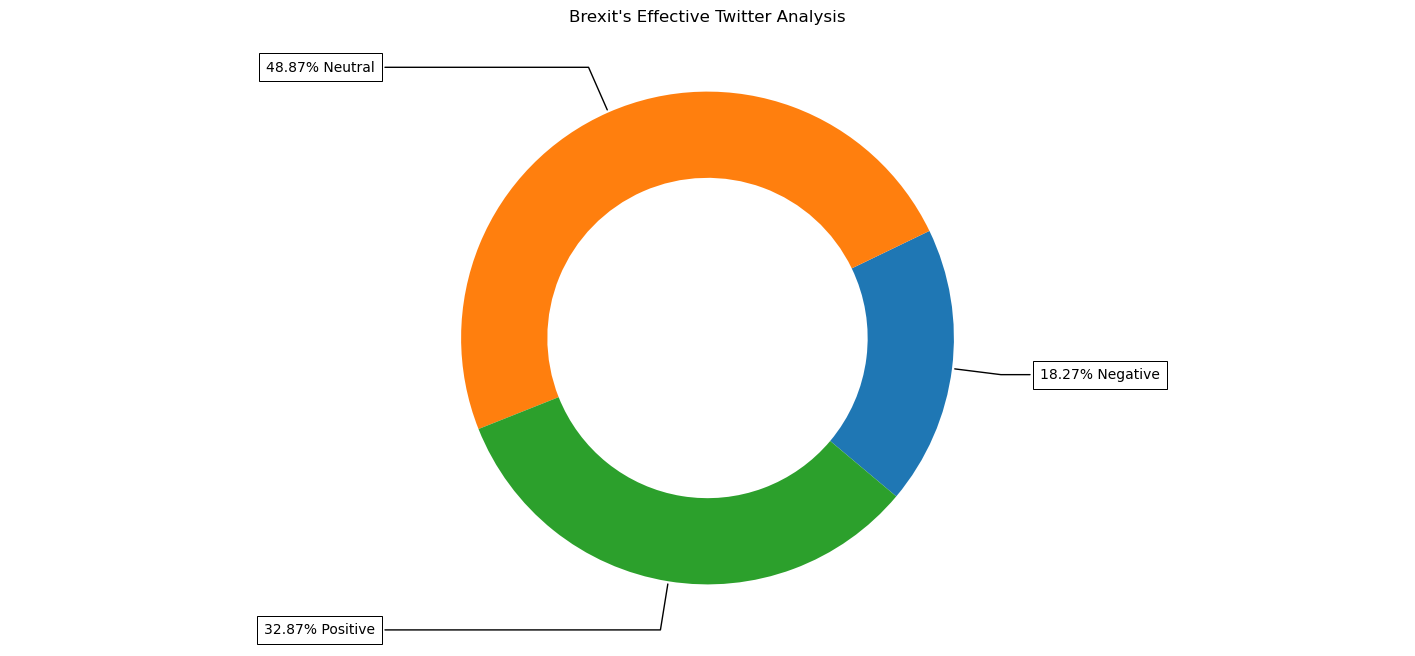

In [36]:
fig, ax = plt.subplots(figsize=(18, 8), subplot_kw=dict(aspect="equal"))
ax.axis("equal")

data = [
    100 * round(sum(brexit_effective_dataset['Sentiment'] < 0) / len(brexit_effective_dataset['Sentiment']), 5),
    100 * round(sum(brexit_effective_dataset['Sentiment'] == 0) / len(brexit_effective_dataset['Sentiment']), 5),
    100 * round(sum(brexit_effective_dataset['Sentiment'] > 0) / len(brexit_effective_dataset['Sentiment']), 5)
]
labels = ['Negative','Neutral','Positive']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.35), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate("{:.2f}%".format(data[i]) + " " + labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.2*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Brexit's Effective Twitter Analysis")
plt.show()

In [37]:
brexit_effective_dataset.sort_values(["Retweets", "Favorites"], ascending=False)
brexit_effective_dataset_retweeted = brexit_effective_dataset.drop(brexit_effective_dataset[brexit_effective_dataset.Retweets <= 10].index)
brexit_effective_dataset_retweeted.sort_values(["Retweets", "Favorites"], ascending=False).head(10)

,Username,Date,Favorites,Retweets,Hashtags,Text,Sentiment
160,drbenwhite,2017-03-30 23:35:49+00:00,585,1059,"['#Brexit', '#NHScrisis']","Whilst you lot are all obsessed with #Brexit ,...",-0.218519
850,CostlyWrath,2017-03-30 22:32:37+00:00,520,331,"['#brexit', '#Article50', '#GreatRepealBill']",Let me reiterate: We won't be silenced. We won...,0.000000
863,sawdoctors,2017-03-30 22:31:40+00:00,149,64,['#brexit'],#brexit pic.twitter.com/CK2pOsJPUp,0.000000
1206,AngusMacNeilSNP,2017-03-30 22:11:34+00:00,70,57,"['#bbcqt', '#brexit']",#bbcqt post #brexit ref ...Ruth Davidson was s...,-0.071429
577,LondonEconomic,2017-03-30 22:55:53+00:00,39,49,"['#BBCQT', '#brexit']",Quiz: Just for fun who said these following st...,0.150000
972,EuropeElects,2017-03-30 22:24:37+00:00,50,47,['#Brexit'],"Italy, Winpoll poll: Eurozone Membership Refer...",0.000000
104,SuzanneEvans1,2017-03-30 23:43:33+00:00,84,45,['#Brexit'],Yep. #Brexit pic.twitter.com/Wbtc850euU,0.000000
855,Paul_D1963,2017-03-30 22:32:19+00:00,110,42,['#brexit'],"Labour for 35 years as voter, member & candida...",0.250000
567,HerbertEkweEkwe,2017-03-30 22:56:41+00:00,0,41,"['#Biafra', '#predates', '#Brexit', '#50years'...",#Biafra #predates #Brexit by #50years http:// ...,0.000000
922,DVATW,2017-03-30 22:28:26+00:00,75,30,"['#UKIP', '#Corbyn', '#Brexit', '#bbcqt']",BBC narrative #UKIP are finished #Corbyn can w...,0.800000


In [38]:
G1 = nx.Graph()
G1.clear()
indexs = []
indexs.extend(brexit_effective_dataset_retweeted.index)
for ind in indexs:
    G1.add_node(ind, text=clean_tweet(brexit_effective_dataset_retweeted.loc[[ind]].values[0][5]), retweets=brexit_effective_dataset_retweeted.loc[[ind]].values[0][3])

In [39]:
edges = []
j = 0
for ind in indexs:
    j = j+1
    item = brexit_effective_dataset_retweeted.loc[[ind]].values[0]
    hash_list = item[4][2:-2].split("', '")
    for l in hash_list:
        l = l.lower()
    for i in range(j,len(brexit_effective_dataset_retweeted)-1):
        other_hash_list = brexit_effective_dataset_retweeted.iloc[[i]].values[0][4][2:-2].split("', '")
        for l in other_hash_list:
            l = l.lower()
        if len(list(set(hash_list) & set(other_hash_list))) > 0:
            edges.append((ind, brexit_effective_dataset_retweeted.iloc[[i]].index[0], len(list(set(hash_list) & set(other_hash_list)))))
G1.add_weighted_edges_from(edges)

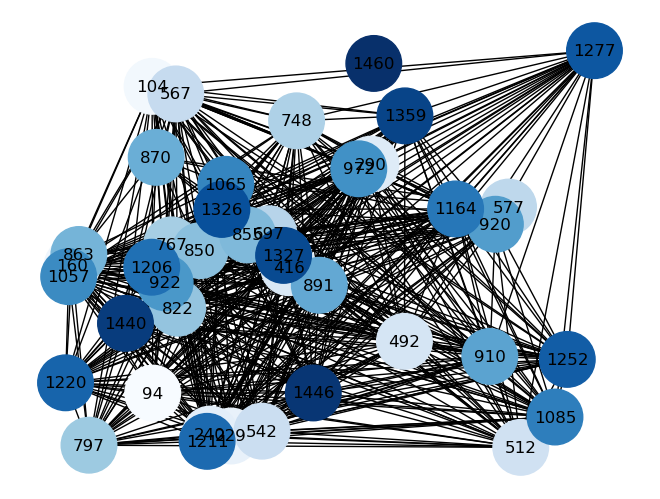

In [40]:
nx.draw(G1, node_size=1600, cmap=plt.cm.Blues,
        node_color=range(len(G1)), pos=nx.random_layout(G1), with_labels=True)

In [41]:
nx.write_gexf(G1, "brexit_effective.gexf")
fh=open("test.adjlist",'wb')
nx.write_adjlist(G1, fh)

<center>
    <strong>Retweeted tweets and shared hashtags</strong>
    <img src="Brexit_Effective_Graph_Analysis.png">
</center>

In [42]:
# Identify which tweets are the centers of interest
brexit_effective_dataset_retweeted.loc[[160]] # most retweeted is a negative one

,Username,Date,Favorites,Retweets,Hashtags,Text,Sentiment
160,drbenwhite,2017-03-30 23:35:49+00:00,585,1059,"['#Brexit', '#NHScrisis']","Whilst you lot are all obsessed with #Brexit ,...",-0.218519


In [43]:
brexit_effective_dataset_retweeted.loc[[1164]]
brexit_effective_dataset_retweeted.loc[[1085]]
brexit_effective_dataset_retweeted.loc[[1057]]
brexit_effective_dataset_retweeted.loc[[1359]]
brexit_effective_dataset_retweeted.loc[[1164]]
brexit_effective_dataset_retweeted.loc[[1211]]
brexit_effective_dataset_retweeted.loc[[1252]]
brexit_effective_dataset_retweeted.loc[[1277]]
brexit_effective_dataset_retweeted.loc[[910]]

,Username,Date,Favorites,Retweets,Hashtags,Text,Sentiment
910,shelleypetersen,2017-03-30 22:28:45+00:00,0,18,"['#healthinnovations', '#pharma', '#banking', ...",7 key moments from Germany’s Brexit debate htt...,0.0
